In [4]:
import numpy as np
import matplotlib.pyplot as plt
import signac
import pandas as pd
import h5py

20


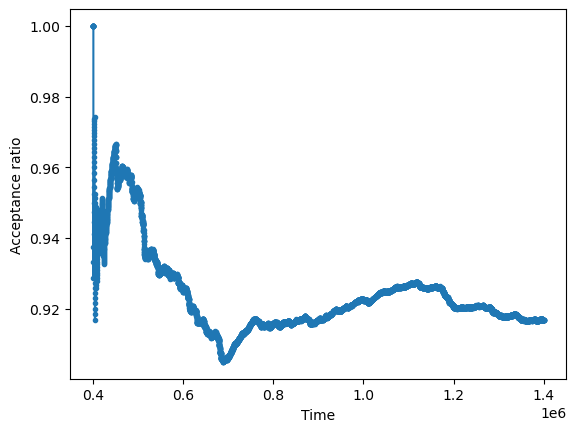

In [7]:
kT = 1.0
bias_sim_info = h5py.File('./data/WTMetaD_log.hdf5','r')['hoomd-data']
bias_t = bias_sim_info['t'][:]
acceptance_ratio = bias_sim_info['acceptance_ratio'][:]
cv = bias_sim_info['collective_variable'][:]
extra_cv = bias_sim_info['extra_collective_variable'][:]
bias_pot = bias_sim_info['bias_potential'][:]
ebetac = bias_sim_info['ebetac'][:]

bias_his_info = pd.read_csv('./data/WTMetaD_history.txt', sep='\s+')
t_his = bias_his_info['t']
cv_his = bias_his_info['cv_0(t)']
h_his = bias_his_info['h(t)']
print(len(h_his))

fig, ax = plt.subplots()
ax.plot(bias_t, acceptance_ratio, marker='.')
ax.set_xlabel('Time')
ax.set_ylabel('Acceptance ratio')
plt.show()

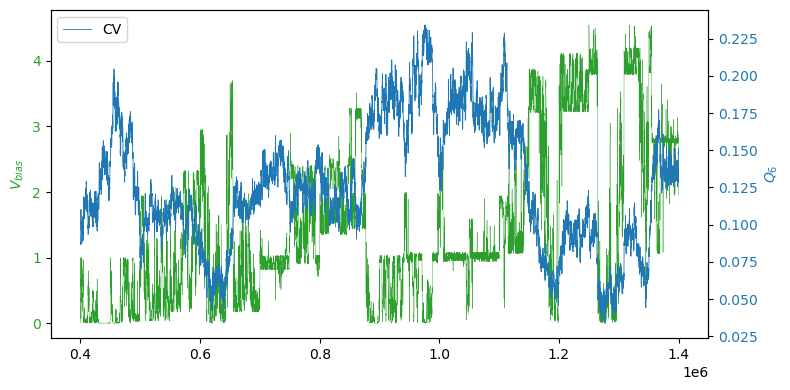

In [14]:
fig, ax2 = plt.subplots(figsize=(8, 4), dpi=100)
ax = ax2.twinx()
# ax.plot(bias_t, extra_cv, linewidth=0.3, label='2nd CV')
ax.plot(bias_t, cv, linewidth=0.6, label='CV')

ax.set_ylabel("$Q_6$", color='tab:blue')
ax.tick_params(axis='y', labelcolor='tab:blue')
ax.legend(loc='upper left')

ax2.plot(bias_t, bias_pot, linewidth=0.3, color='tab:green')
ax2.set_ylabel("$V_{bias}$", color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')
ax.set_xlabel("Time")

plt.tight_layout()
plt.show()

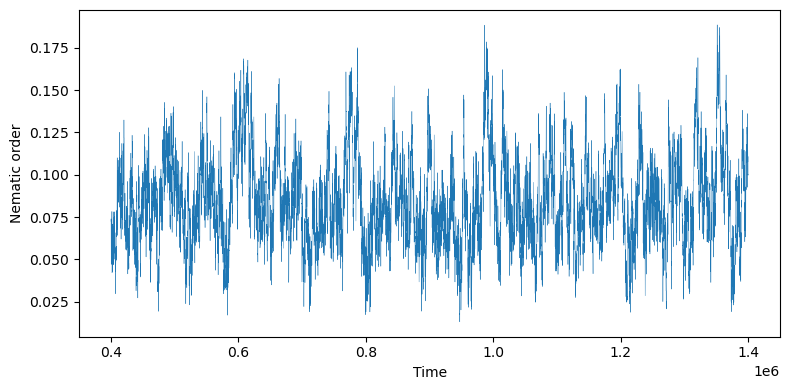

In [12]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=100)

ax.plot(bias_t, extra_cv, linewidth=0.3)
ax.set_ylabel("Nematic order")
ax.set_xlabel("Time")

plt.tight_layout()
plt.show()

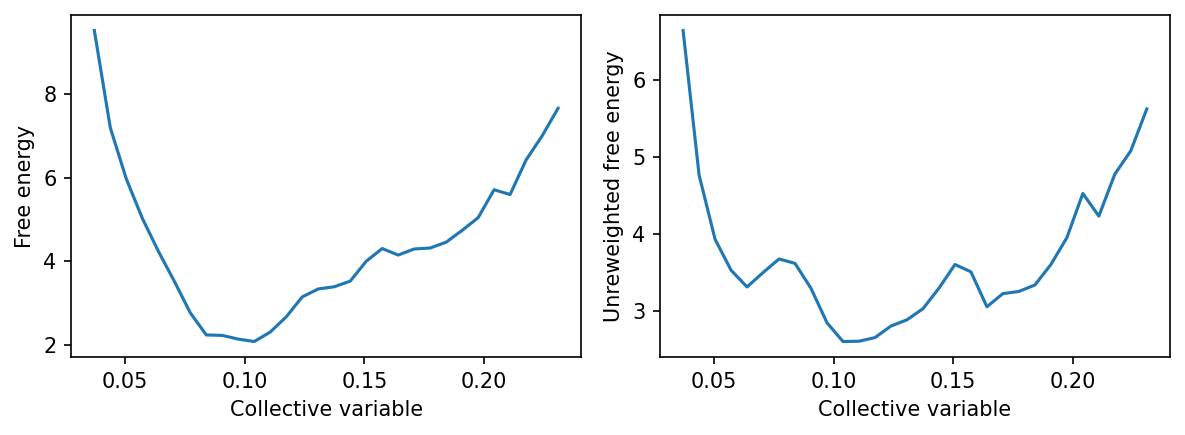

In [16]:
weights = np.exp(bias_pot/kT) / ebetac
number_bins = 30
hist, bin_edges = np.histogram(cv, bins=number_bins, #range=(0.5, 300),
                               density=False, weights=weights)
prob = hist/sum(hist)
mids = 0.5*(bin_edges[1:]+bin_edges[:-1])

freeE = -kT * np.log(prob)
fig, axs = plt.subplots(1, 2, figsize=(8, 3), dpi=150)
axs[0].plot(mids, freeE)
axs[0].set_xlabel("Collective variable")
axs[0].set_ylabel("Free energy")

# Plot unreweighted free energy profile side by side for comparison
unweighted_hist, unweighted_bin_edges = np.histogram(cv, bins=number_bins, density=False)
unweighted_prob = unweighted_hist/sum(unweighted_hist)
unweighted_freeE = -kT * np.log(unweighted_prob)
unweighted_mids = 0.5*(unweighted_bin_edges[1:]+unweighted_bin_edges[:-1])
axs[1].plot(unweighted_mids, unweighted_freeE)
axs[1].set_xlabel("Collective variable")
axs[1].set_ylabel("Unreweighted free energy")
plt.tight_layout()
plt.show()